# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [4]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


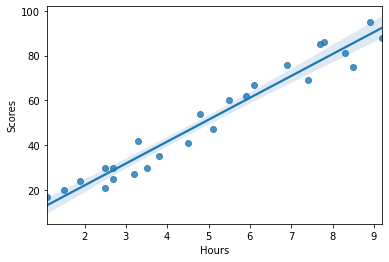

In [10]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.show()

# Predictive Modelling- Linear Regression

In [11]:
data_train=data.iloc[:20]
data_test=data.iloc[20:]

In [12]:
x_train=data_train.drop(['Scores'],axis=1)
y_train=data_train['Scores']
x_test=data_test.drop(['Scores'],axis=1)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lreg=LinearRegression()

In [15]:
lreg.fit(x_train,y_train)

LinearRegression()

In [16]:
lreg.score(x_train,y_train)

0.9554562450839484

In [17]:
pred=lreg.predict(x_test)

In [18]:
df1=pd.DataFrame({'Actual':data_test['Scores'],'Predicted':pred})
df1

,Actual,Predicted
20,30,28.736325
21,54,48.729136
22,35,39.208750
23,76,68.721947
24,86,77.290295


# Final Prediction

In [19]:
dict1={'Hours':[9.25]}
df=pd.DataFrame(dict1)

In [20]:
df['Scores']=lreg.predict(df)
df

,Hours,Scores
0,9.25,91.094854


In [21]:
print('Hence, the score if student studies for 9.25 hours is: {}'.format(list(df['Scores'])[0]))

Hence, the score if student studies for 9.25 hours is: 91.09485441683266


# Evaluating the model

In [22]:
def rmse(y,y1):
    add=(y-y1)**2
    final=np.sqrt(np.mean(add))
    return final

In [23]:
print('Therefore, the root mean squared error is {}'.format(rmse(data_test['Scores'],pred)))

Therefore, the root mean squared error is 5.931635159442725
